In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from models.RegressãoPolinomial.model import PolynomialRegression, DataNormalizer
from models.RegressãoPolinomial.model_l2 import PolynomialRegressionL2

In [2]:
df = pd.read_csv(r"C:\Users\jorge\OneDrive\Área de Trabalho\pattern-recognition-RP\data\gauss.csv")

In [3]:
df

,x,y
0,1.0,97.587760
1,2.0,97.763440
2,3.0,96.567050
3,4.0,92.520370
4,5.0,91.150970
...,...,...
245,246.0,8.362109
246,247.0,8.983507
247,248.0,3.362469
248,249.0,1.182678


In [4]:
X, y = df.iloc[:, 0], df.iloc[:, 1]

In [5]:
X.shape, y.shape

((250,), (250,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape, y_train.shape

((175,), (175,))

In [8]:
rmse_test_list = []
rmse_train_list = []

In [9]:
x_generated = pd.Series(index=range(1000))
x_generated[:] = np.random.uniform(0, 250, 1000)

In [10]:
y_predicts_list = []

In [11]:
X_train.shape, y_train.shape

((175,), (175,))

In [12]:
for p in range(1,21):
    model = PolynomialRegressionL2(number_polynomial=p)
    model.fit(X_train, y_train)
    y_predicts_list.append(model.predict(x_generated))

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    rmse_test_list.append(rmse_test)
    rmse_train_list.append(rmse_train)

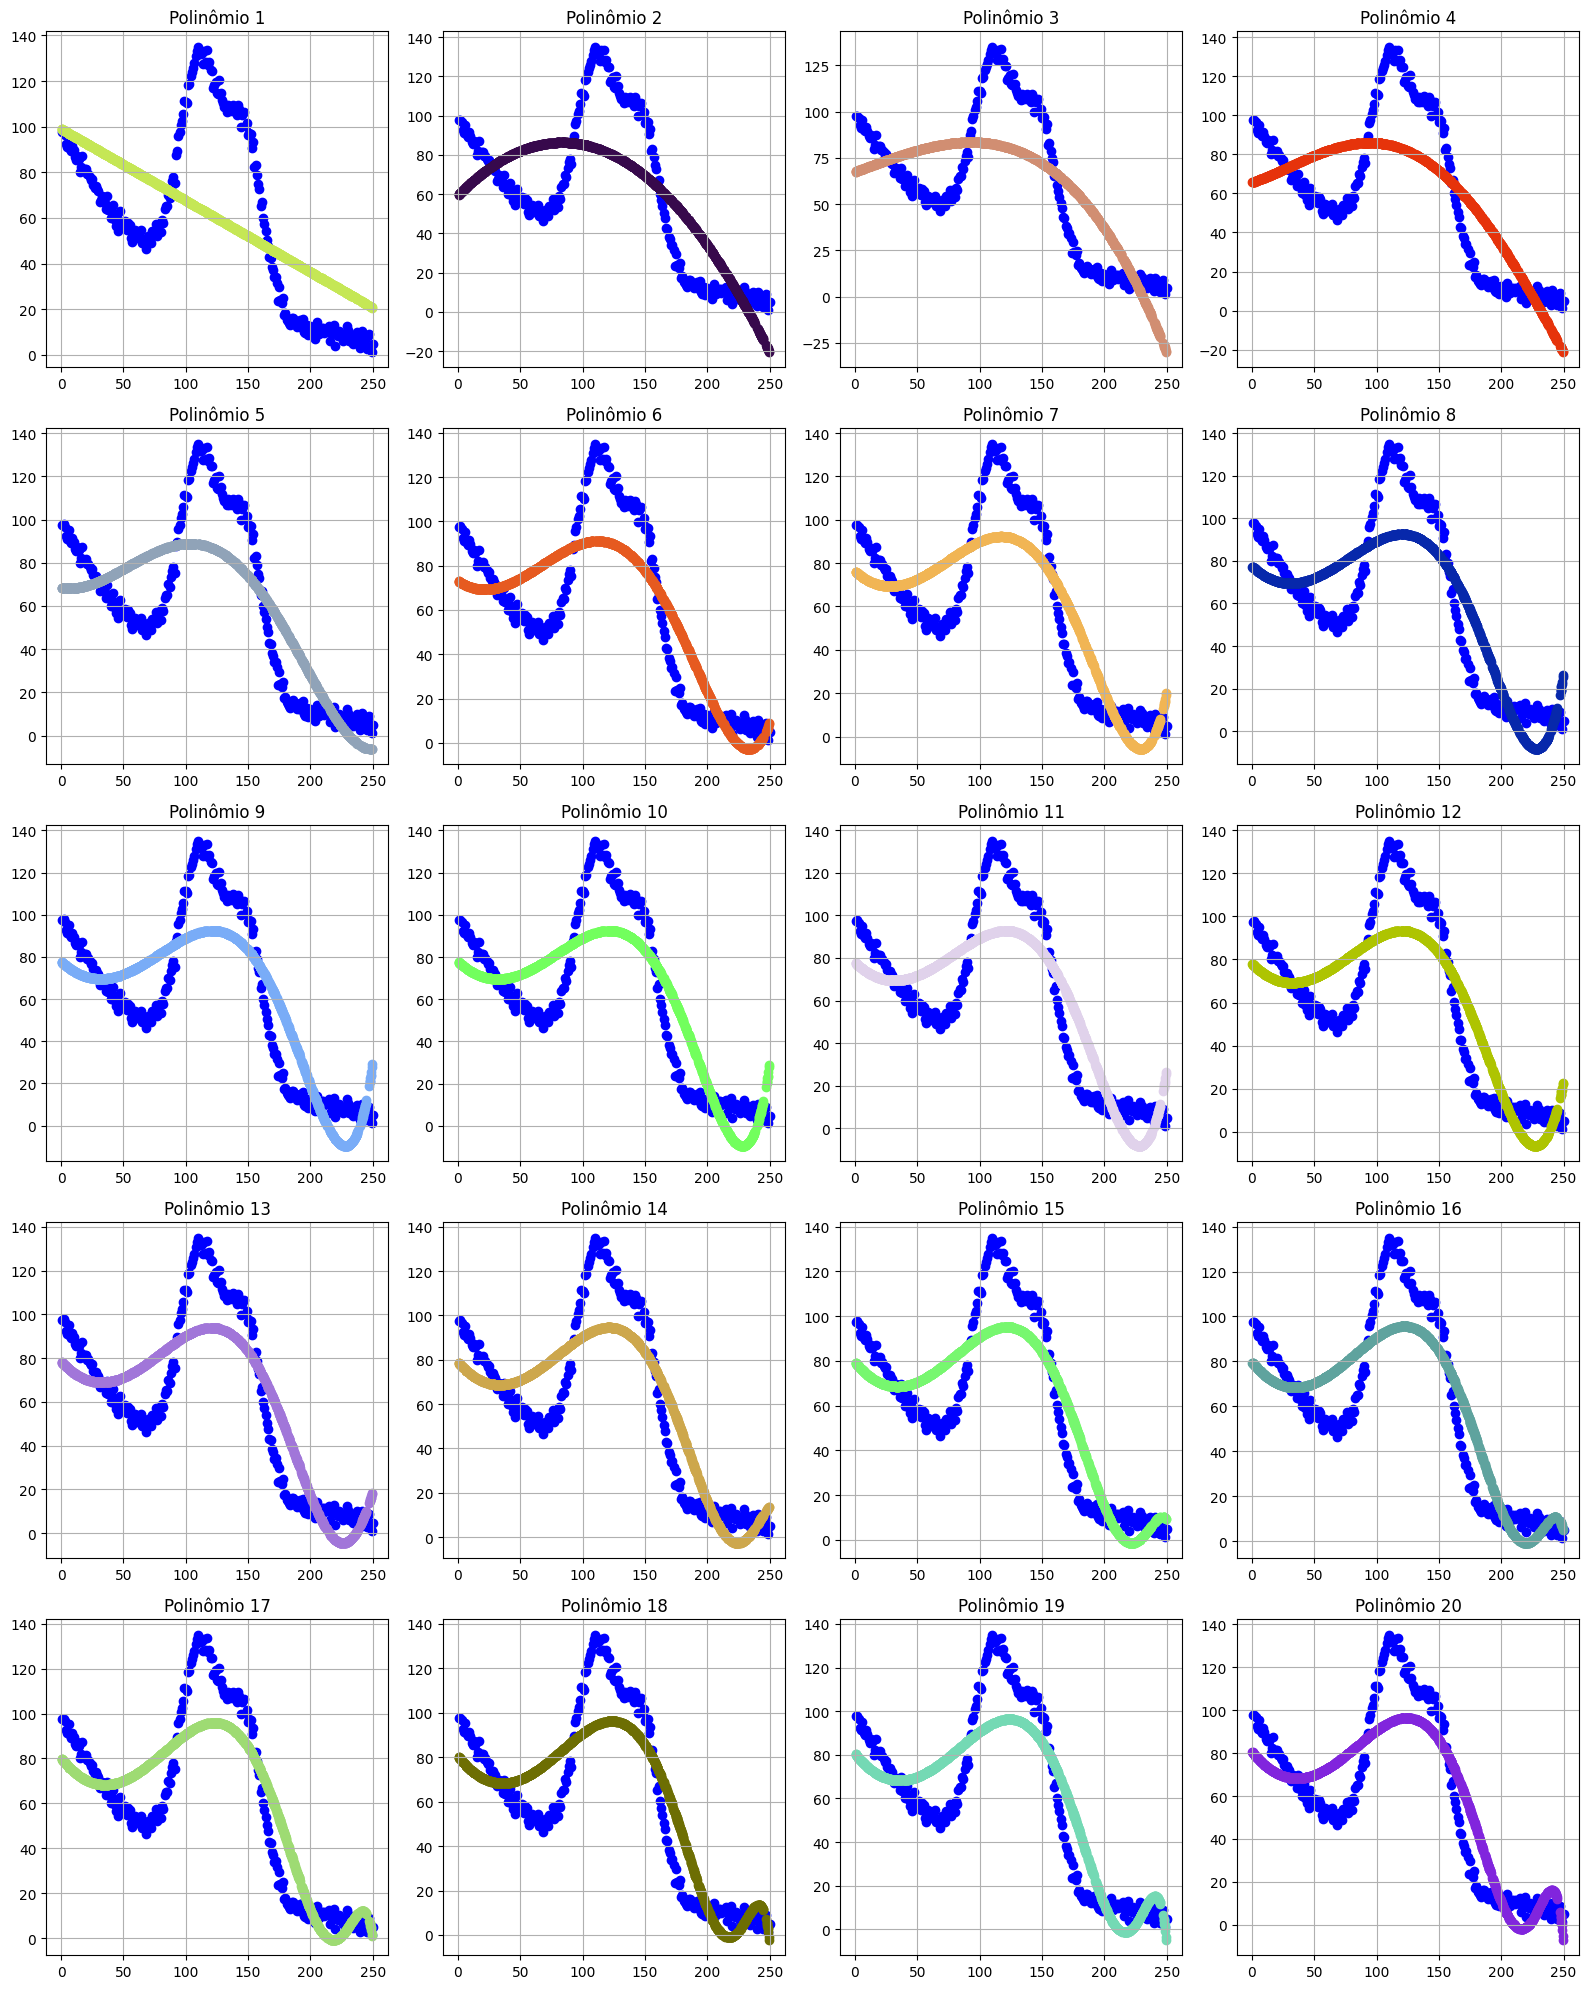

In [13]:
fig, axes = plt.subplots(5, 4, figsize=(16, 20))  
for i, ax in enumerate(axes.flat):
    ax.scatter(X, y, color='blue', label='Dados Reais')  # Valores reais
    ax.scatter(x_generated, y_predicts_list[i], color=np.random.rand(3,))
    ax.set_title(f"Polinômio {i+1}")
    ax.grid(True)

plt.tight_layout()
plt.show()

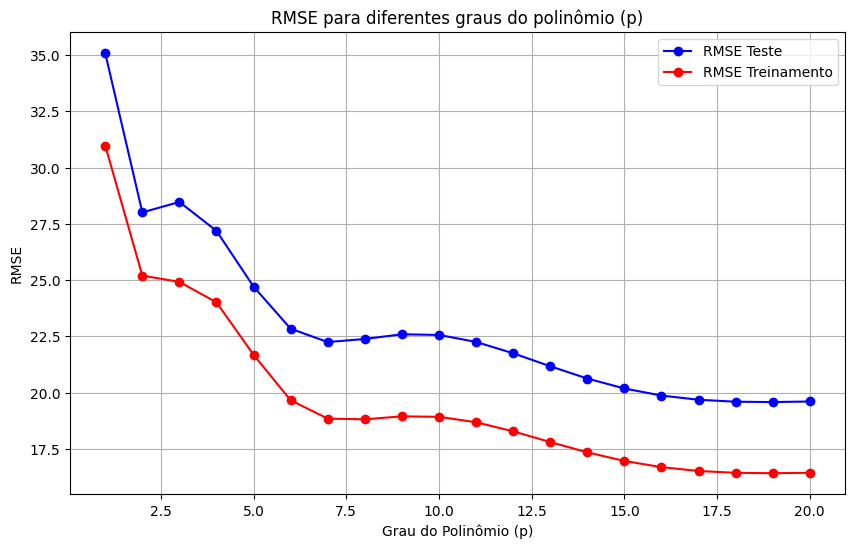

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), rmse_test_list, label='RMSE Teste', marker='o', linestyle='-', color='blue')
plt.plot(range(1, 21), rmse_train_list, label='RMSE Treinamento', marker='o', linestyle='-', color='red')

plt.title('RMSE para diferentes graus do polinômio (p)')
plt.xlabel('Grau do Polinômio (p)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()